## Aprendizado Não Supervisionado - Agrupamento de Dados
#### Prof. Thomas da Silva Paula

## Comparação de algoritmos de Agrupamento de Dados

É muito comum realizarmos comparação de algoritmos durante o desenvolvimento de soluções que utilizam Machine Learning. No caso de Aprendizado Supervisionado, existem muitas formas de avaliar os resultados, tais como Matriz de Confusão, Medida F1 e Curva ROC. No entanto, a avaliação de algoritmos de Aprendizado Não Supervisionado tem desafios adicionais, pois não temos algo sendo otimizado diretamente. Isso torna a avaliação mais complexa e um tanto quanto subjetiva, principalmente no caso de Agrupamento de Dados. Neste trabalho, iremos exercitar esses conceitos, realizando tarefas muito similares às que Cientistas de Dados fazem no seu dia-a-dia. 


### Descrição

#### Algoritmos
Implementar três algoritmos diferentes de agrupamento de dados (utilizando as bibliotecas `scikit-learn` e `scipy`), para realizar agrupamento de diferentes imagens de uma base de dados. Idealmente os algoritmos devem ser de tipos diferents. Para facilitar o processo de feature extraction, foram disponibilizados dois Numpy arrays com as features das imagens extraídas com uma VGG16 e uma ResNet18. Tais features devem ser utilizadas como entrada para os diferentes algoritmos de agrupamento de dados escolhidos.


#### Avaliação (Validação) dos Clusters
* **Quantitativa**:Para comparação dos algoritmos, devem ser escolhidos três métodos de avaliação diferentes, sendo um interno, um externo e um relativo. O objetivo é avaliar a diferença dos índices para diferentes hiperparâmetros de um mesmo algoritmo e para comparar os resultados de diferentes algoritmos. Lembre-se das diferenças de cada um deles e quando eles se aplicam.
* **Subjetiva:** Para a avaliação subjetiva, deve-se criar uma visualização das imagens dos grupos (pode-se inspirar no exemplo mostrado pelo professor).


### Requisitos
* Escolher três algoritmos diferentes de agrupamento de dados. Escolher um de cada paradigma diferente, como por exemplo um particional, um hierárquico e um por densidade. Podem ser algoritmos não vistos em aula, como Mean-Shift, Spectral Clustering, Affinity Propagation, entre outros.
* Escolher e implementar os três algoritmos usando as bibliotecas `scikit-learn` e `scipy`.
* Escolher e implementar os três métodos de avaliação, lembrando que deve-se utilizar um índice interno, um externo e um relativo. Usar os índices onde foram aplicáveis e, caso acredite que não se aplique, justifique suas escolhas.
* Realizar experimentos com dois conjuntos diferentes de features, sendo um deles da VGG16 e outra da ResNet18.
* Implementar um método para comparação subjetiva (visual), onde deve ser possível visualizar imagens de diferentes grupos.
* A partir dos experimentos realizados, deve-se escrever um relatório detalhando as escolhas feitas, os experimentos realizados e, principalmente, o aprendizado. Os diferentes hiperparâmetros utilizados (e.g. $\epsilon$ do DBSCAN) em diferentes experimentos não precisam ser todos colocados, porém o racional para ter chegado em tais valores deve ficar claro (o que implica em explicar por onde começou). É importante colocar os desafios e dificuldades enfrentadas.
* Você pode utilizar diferentes estratégias de pré-processamento e redução de dimensionalidde. Fica a seu critério.
* **Atenção!**: Existe um número "correto" de grupos para essa base de dados, porém a análise não deve se concentrar apenas neste número. Use a criatividade e explore diferentes formas em que os dados podem ser agrupados, fugindo do que seriam os agrupamentos mais "naturais"!


#### Ideias extras
* **(Extra 1)**: Foram disponibilizadas features da ResNet101 também. Um bom exercício é utilizar os algoritmos com os melhores hiperparâmetros com as features da ResNet101 e comparar com os resultados da VGG16 e da ResNet18.
* **(Extra 2)**: Vamos aprender nas próximas aulas sobre redução de dimensionalidade. Faça experimentos com redução de dimensionalidade e compare com os agrupamentos anteriores. Faça a redução para duas dimensões e observe se a separação dos dados.

### Exemplo de visualização subjetiva
![alt text](cluster_evaluation.png "Exemplo Visualização")

#### Entrega final
* Jupyter notebook com os experimentos realizados (.ipynb e um .html ou .pdf).
* Relatório em formato .pdf com os resultados e conclusões. Caso prefira, os resultados e conclusões podem ser colocados diretamente no Jupyter notebook, desde que fique bem explicado e claro.

In [24]:
import os
import time
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors
from sklearn import metrics

from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import fcluster
from scipy.cluster.hierarchy import dendrogram
from sklearn.metrics import adjusted_rand_score

%matplotlib inline

sns.set(style='darkgrid', context='talk', rc={'figure.figsize': (14, 8)})

# Load Data - VGG16

In [41]:
features_path = "/home/panda/temp/unsupervised_learning_class/npys"
path1 = os.path.join(features_path, "vgg16_features.npy")
path2 = os.path.join(features_path, "resnet18_features.npy")
path3 = os.path.join(features_path, "original_labels.npy")
path4 = os.path.join(features_path, "images_path.npy")
features1 = np.load(path1)
features2 = np.load(path2)
y = np.load(path3)
paths = np.load(path4)
for i in range(0,len(y)):
    print(y[i],paths[i])

0 /data/thomas/datasets/kaggle/natural_images_100/airplane/airplane_0016.jpg
0 /data/thomas/datasets/kaggle/natural_images_100/airplane/airplane_0029.jpg
0 /data/thomas/datasets/kaggle/natural_images_100/airplane/airplane_0030.jpg
0 /data/thomas/datasets/kaggle/natural_images_100/airplane/airplane_0038.jpg
0 /data/thomas/datasets/kaggle/natural_images_100/airplane/airplane_0047.jpg
0 /data/thomas/datasets/kaggle/natural_images_100/airplane/airplane_0055.jpg
0 /data/thomas/datasets/kaggle/natural_images_100/airplane/airplane_0061.jpg
0 /data/thomas/datasets/kaggle/natural_images_100/airplane/airplane_0064.jpg
0 /data/thomas/datasets/kaggle/natural_images_100/airplane/airplane_0066.jpg
0 /data/thomas/datasets/kaggle/natural_images_100/airplane/airplane_0075.jpg
0 /data/thomas/datasets/kaggle/natural_images_100/airplane/airplane_0089.jpg
0 /data/thomas/datasets/kaggle/natural_images_100/airplane/airplane_0091.jpg
0 /data/thomas/datasets/kaggle/natural_images_100/airplane/airplane_0094.jpg

5 /data/thomas/datasets/kaggle/natural_images_100/fruit/fruit_0753.jpg
5 /data/thomas/datasets/kaggle/natural_images_100/fruit/fruit_0762.jpg
5 /data/thomas/datasets/kaggle/natural_images_100/fruit/fruit_0768.jpg
5 /data/thomas/datasets/kaggle/natural_images_100/fruit/fruit_0778.jpg
5 /data/thomas/datasets/kaggle/natural_images_100/fruit/fruit_0797.jpg
5 /data/thomas/datasets/kaggle/natural_images_100/fruit/fruit_0803.jpg
5 /data/thomas/datasets/kaggle/natural_images_100/fruit/fruit_0804.jpg
5 /data/thomas/datasets/kaggle/natural_images_100/fruit/fruit_0805.jpg
5 /data/thomas/datasets/kaggle/natural_images_100/fruit/fruit_0812.jpg
5 /data/thomas/datasets/kaggle/natural_images_100/fruit/fruit_0814.jpg
5 /data/thomas/datasets/kaggle/natural_images_100/fruit/fruit_0816.jpg
5 /data/thomas/datasets/kaggle/natural_images_100/fruit/fruit_0820.jpg
5 /data/thomas/datasets/kaggle/natural_images_100/fruit/fruit_0832.jpg
5 /data/thomas/datasets/kaggle/natural_images_100/fruit/fruit_0847.jpg
5 /dat

# O método Elbow

In [26]:
%%time

min_clusters = 1
max_clusters1 = int(np.sqrt(len(features1)))
max_clusters2 = int(np.sqrt(len(features2)))

clusters_range1 = range(min_clusters, max_clusters1 + 1)
clusters_range2 = range(min_clusters, max_clusters2 + 1)

inertias1 = []
inertias2 = []

for k in clusters_range1:
    model = KMeans(n_clusters=k)
    model.fit(features1)
    
    cur_inertia = model.inertia_
    inertias1.append(cur_inertia)

for k in clusters_range2:
    model = KMeans(n_clusters=k)
    model.fit(features2)
    
    cur_inertia = model.inertia_
    inertias2.append(cur_inertia)

CPU times: user 1min 16s, sys: 80.9 ms, total: 1min 16s
Wall time: 1min 22s


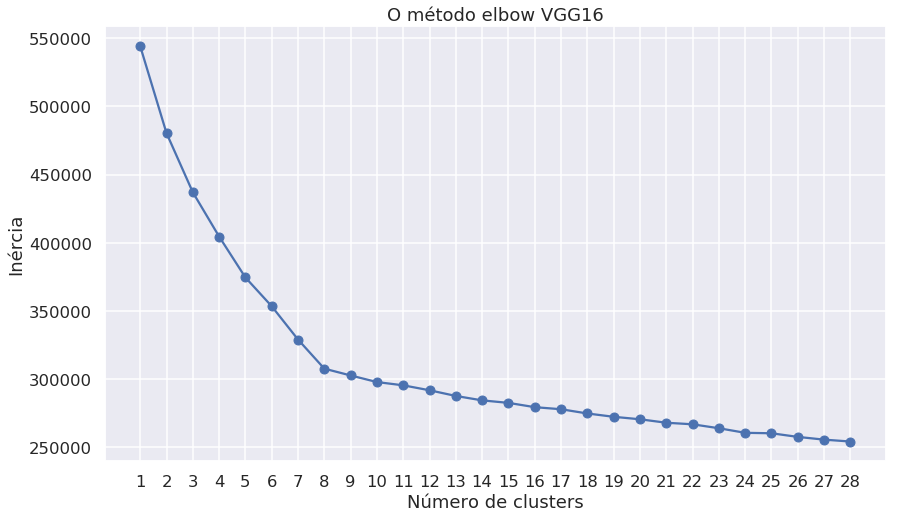

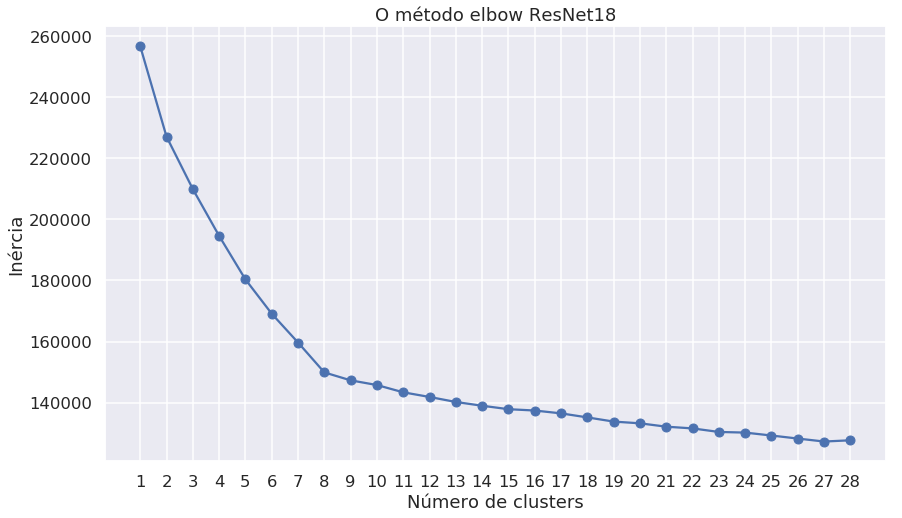

In [27]:
_ = plt.plot(clusters_range1, inertias1, '-o')
_ = plt.title('O método elbow VGG16')
_ = plt.xlabel('Número de clusters')
_ = plt.ylabel('Inércia')
_ = plt.xticks(clusters_range1)
plt.show()
_ = plt.plot(clusters_range2, inertias2, '-o')
_ = plt.title('O método elbow ResNet18')
_ = plt.xlabel('Número de clusters')
_ = plt.ylabel('Inércia')
_ = plt.xticks(clusters_range2)
plt.show()

O método elbow sugere que o número de classes do dataset está ente sete e nove.

# Algoritmo Particional - K-Means

In [45]:

km1 = KMeans(n_clusters=8)
km1.fit(features1)
labels1 = km1.labels_

km2 = KMeans(n_clusters=8)
km2.fit(features2)
labels2 = km2.labels_

print('VGG Adjusted Rand Index', round(adjusted_rand_score(y, labels1), 4))
print('ResNet18 Adjusted Rand Index', round(adjusted_rand_score(y, labels2), 4))

print('VGG labels')
for i in range(0,len(features1)):
    print(labels1[i], paths[i])
    
print('ResNet18 labels')
for i in range(0,len(features2)):
    print(labels2[i], paths[i])

VGG Adjusted Rand Index 0.9914
ResNet18 Adjusted Rand Index 0.9777
VGG labels
2 /data/thomas/datasets/kaggle/natural_images_100/airplane/airplane_0016.jpg
2 /data/thomas/datasets/kaggle/natural_images_100/airplane/airplane_0029.jpg
2 /data/thomas/datasets/kaggle/natural_images_100/airplane/airplane_0030.jpg
2 /data/thomas/datasets/kaggle/natural_images_100/airplane/airplane_0038.jpg
2 /data/thomas/datasets/kaggle/natural_images_100/airplane/airplane_0047.jpg
2 /data/thomas/datasets/kaggle/natural_images_100/airplane/airplane_0055.jpg
2 /data/thomas/datasets/kaggle/natural_images_100/airplane/airplane_0061.jpg
2 /data/thomas/datasets/kaggle/natural_images_100/airplane/airplane_0064.jpg
2 /data/thomas/datasets/kaggle/natural_images_100/airplane/airplane_0066.jpg
2 /data/thomas/datasets/kaggle/natural_images_100/airplane/airplane_0075.jpg
2 /data/thomas/datasets/kaggle/natural_images_100/airplane/airplane_0089.jpg
2 /data/thomas/datasets/kaggle/natural_images_100/airplane/airplane_0091.jp

# Algoritmo Hierárquico - TBD

VGG Adjusted Rand Index 0.5877
ResNet18 Adjusted Rand Index 0.5811
VGG labels
11 /data/thomas/datasets/kaggle/natural_images_100/airplane/airplane_0016.jpg
11 /data/thomas/datasets/kaggle/natural_images_100/airplane/airplane_0029.jpg
11 /data/thomas/datasets/kaggle/natural_images_100/airplane/airplane_0030.jpg
11 /data/thomas/datasets/kaggle/natural_images_100/airplane/airplane_0038.jpg
11 /data/thomas/datasets/kaggle/natural_images_100/airplane/airplane_0047.jpg
11 /data/thomas/datasets/kaggle/natural_images_100/airplane/airplane_0055.jpg
11 /data/thomas/datasets/kaggle/natural_images_100/airplane/airplane_0061.jpg
11 /data/thomas/datasets/kaggle/natural_images_100/airplane/airplane_0064.jpg
11 /data/thomas/datasets/kaggle/natural_images_100/airplane/airplane_0066.jpg
11 /data/thomas/datasets/kaggle/natural_images_100/airplane/airplane_0075.jpg
11 /data/thomas/datasets/kaggle/natural_images_100/airplane/airplane_0089.jpg
11 /data/thomas/datasets/kaggle/natural_images_100/airplane/airp

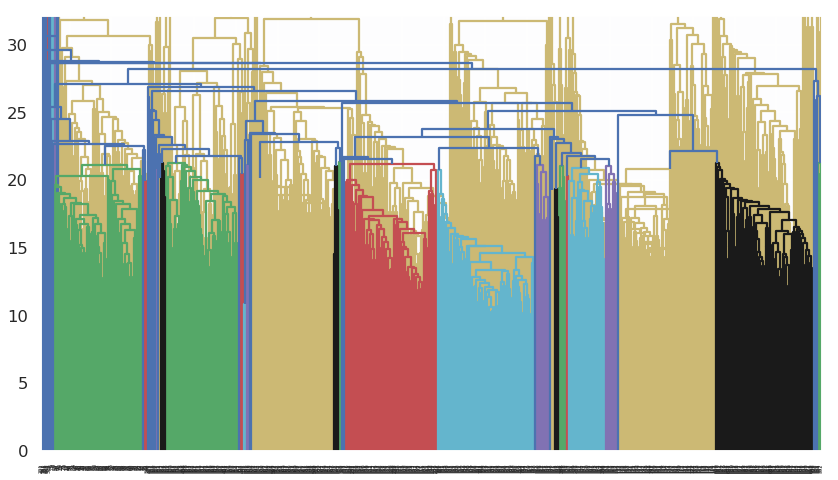

In [58]:
linkage_matrix1 = linkage(features1, method='average')
linkage_matrix2 = linkage(features2, method='average')
d1 = dendrogram(linkage_matrix1)
d2 = dendrogram(linkage_matrix2)
df_with_label1 = features1.copy()
df_with_label2 = features2.copy()
labels1 = fcluster(linkage_matrix1, 35, 'distance')
labels2 = fcluster(linkage_matrix2, 24, 'distance')
print('VGG Adjusted Rand Index', round(adjusted_rand_score(y, labels1), 4))
print('ResNet18 Adjusted Rand Index', round(adjusted_rand_score(y, labels2), 4))
print('VGG labels')
for i in range(0,len(features1)):
    print(labels1[i], paths[i])
    
print('ResNet18 labels')
for i in range(0,len(features2)):
    print(labels2[i], paths[i])

# Algoritmo por Densidade - DBSCAN

In [59]:
%%time

best_eps = -1.0
best_samples = 2
best_silhouette = -1.0
best_components = 1
for i in range(2,int(max_clusters1)):
    pca = PCA(n_components=i)
    new_features = pca.fit_transform(features1)
    for samples in range(3,10):
        for k in np.arange(0.1, 10.0, 0.1):
            model = DBSCAN(eps=k, min_samples=samples)
            model.fit(new_features)
            labels = model.labels_
            n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
            n_noise_ = list(labels).count(-1)
            #using the value we got from elbow...
            if n_clusters_ == 8:
                silhouette = metrics.silhouette_score(new_features, labels)
                if best_silhouette < silhouette:
                    best_components = i
                    best_eps = k
                    best_samples = samples
                    best_silhouette = silhouette
pca = PCA(n_components=best_components)
new_features = pca.fit_transform(features1)
model = DBSCAN(eps=best_eps, min_samples=best_samples)
model.fit(new_features)
labels1 = model.labels_
n_clusters_ = len(set(labels1)) - (1 if -1 in labels1 else 0)
n_noise_ = list(labels1).count(-1)
print('Best PCA components: %d' % best_components)
print('Best epsilon: %d' % best_eps)
print('Best min_samples: %d' % best_samples)
print('Best Estimated number of clusters: %d' % n_clusters_)
print('Best Estimated number of noise points: %d' % n_noise_)
silhouette = metrics.silhouette_score(new_features, labels1)
print("Best Silhouette Coefficient: %0.3f" % silhouette)

best_eps = -1.0
best_samples = 2
best_silhouette = -1.0
best_components = 1
for i in range(2,int(max_clusters2)):
    pca = PCA(n_components=i)
    new_features = pca.fit_transform(features2)
    for samples in range(3,10):
        for k in np.arange(0.1, 10.0, 0.1):
            model = DBSCAN(eps=k, min_samples=samples)
            model.fit(new_features)
            labels = model.labels_
            n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
            n_noise_ = list(labels).count(-1)
            #using the value we got from elbow...
            if n_clusters_ == 8:
                silhouette = metrics.silhouette_score(new_features, labels)
                if best_silhouette < silhouette:
                    best_components = i
                    best_eps = k
                    best_samples = samples
                    best_silhouette = silhouette
pca = PCA(n_components=best_components)
new_features = pca.fit_transform(features2)
model = DBSCAN(eps=best_eps, min_samples=best_samples)
model.fit(new_features)
labels2 = model.labels_
n_clusters_ = len(set(labels2)) - (1 if -1 in labels2 else 0)
n_noise_ = list(labels2).count(-1)
print('Best PCA components: %d' % best_components)
print('Best epsilon: %d' % best_eps)
print('Best min_samples: %d' % best_samples)
print('Best Estimated number of clusters: %d' % n_clusters_)
print('Best Estimated number of noise points: %d' % n_noise_)
silhouette = metrics.silhouette_score(new_features, labels2)
print("Best Silhouette Coefficient: %0.3f" % silhouette)

print('VGG Adjusted Rand Index', round(adjusted_rand_score(y, labels1), 4))
print('ResNet18 Adjusted Rand Index', round(adjusted_rand_score(y, labels2), 4))
print('VGG labels')
for i in range(0,len(features1)):
    print(labels1[i], paths[i])
    
print('ResNet18 labels')
for i in range(0,len(features2)):
    print(labels2[i], paths[i])

Best PCA components: 7
Best epsilon: 5
Best min_samples: 4
Best Estimated number of clusters: 8
Best Estimated number of noise points: 12
Best Silhouette Coefficient: 0.650
Best PCA components: 7
Best epsilon: 3
Best min_samples: 5
Best Estimated number of clusters: 8
Best Estimated number of noise points: 35
Best Silhouette Coefficient: 0.616
VGG Adjusted Rand Index 0.9793
ResNet18 Adjusted Rand Index 0.9398
VGG labels
0 /data/thomas/datasets/kaggle/natural_images_100/airplane/airplane_0016.jpg
0 /data/thomas/datasets/kaggle/natural_images_100/airplane/airplane_0029.jpg
0 /data/thomas/datasets/kaggle/natural_images_100/airplane/airplane_0030.jpg
0 /data/thomas/datasets/kaggle/natural_images_100/airplane/airplane_0038.jpg
0 /data/thomas/datasets/kaggle/natural_images_100/airplane/airplane_0047.jpg
0 /data/thomas/datasets/kaggle/natural_images_100/airplane/airplane_0055.jpg
0 /data/thomas/datasets/kaggle/natural_images_100/airplane/airplane_0061.jpg
0 /data/thomas/datasets/kaggle/natura

7 /data/thomas/datasets/kaggle/natural_images_100/person/person_0382.jpg
7 /data/thomas/datasets/kaggle/natural_images_100/person/person_0389.jpg
7 /data/thomas/datasets/kaggle/natural_images_100/person/person_0397.jpg
7 /data/thomas/datasets/kaggle/natural_images_100/person/person_0422.jpg
7 /data/thomas/datasets/kaggle/natural_images_100/person/person_0437.jpg
7 /data/thomas/datasets/kaggle/natural_images_100/person/person_0446.jpg
7 /data/thomas/datasets/kaggle/natural_images_100/person/person_0452.jpg
7 /data/thomas/datasets/kaggle/natural_images_100/person/person_0454.jpg
7 /data/thomas/datasets/kaggle/natural_images_100/person/person_0460.jpg
7 /data/thomas/datasets/kaggle/natural_images_100/person/person_0466.jpg
7 /data/thomas/datasets/kaggle/natural_images_100/person/person_0489.jpg
7 /data/thomas/datasets/kaggle/natural_images_100/person/person_0492.jpg
-1 /data/thomas/datasets/kaggle/natural_images_100/person/person_0496.jpg
7 /data/thomas/datasets/kaggle/natural_images_100/

# Relatório

Para a realização do presente trabalho foram escolhidos os algoritmos ...